In [41]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [42]:
encoder_df = pd.read_pickle("encoder_data/conv_autoencoder_150_50.pkl")

In [43]:
encoder_df

,Label,Encoder Output
0,bus,"[0.0, 12.391744, 30.256796, 18.027126, 14.5293..."
1,bus,"[0.0, 12.391744, 30.256796, 18.027126, 14.5293..."
2,bus,"[0.0, 12.391744, 30.256796, 18.027126, 14.5293..."
3,bus,"[0.0, 12.391744, 30.256796, 18.027126, 14.5293..."
4,bus,"[0.0, 12.391744, 30.256796, 18.027126, 14.5293..."
...,...,...
2995,tubestation,"[6.295613, 9.753875, 31.900227, 27.87225, 19.5..."
2996,tubestation,"[6.295613, 9.753875, 31.900227, 27.87225, 19.5..."
2997,tubestation,"[6.295613, 9.753875, 31.900227, 27.87225, 19.5..."
2998,tubestation,"[6.295613, 9.753875, 31.900227, 27.87225, 19.5..."


In [67]:
labels = encoder_df["Label"]
type(labels)

pandas.core.series.Series

In [71]:
from matplotlib import colormaps

'''
matplotlib.colormaps: Container for colormaps that are known to Matplotlib by name.
'''
label_unique = np.unique(labels)
color_map = colormaps["tab10"]
# color_map = colormaps('tab10', len(label_unique))  # 'viridis' is just one option for a colormap
label_to_color = {key: color_map(i) for i, key in enumerate(label_unique)}

In [75]:
# Map labels to colors
colors = labels.map(label_to_color)

In [76]:
encoder_df['Encoder Output'].values

array([array([ 0.      , 12.391744, 30.256796, ..., 16.32649 , 20.717762,
              42.37139 ], dtype=float32)                                 ,
       array([ 0.      , 12.391744, 30.256796, ..., 63.994766, 63.065876,
              61.822906], dtype=float32)                                 ,
       array([ 0.      , 12.391744, 30.256796, ..., 63.994766, 63.065876,
              62.51169 ], dtype=float32)                                 ,
       ...,
       array([ 6.295613,  9.753875, 31.900227, ..., 70.44307 , 65.529724,
              66.42587 ], dtype=float32)                                 ,
       array([ 6.295613,  9.753875, 31.900227, ..., 73.13775 , 60.075115,
              64.31959 ], dtype=float32)                                 ,
       array([ 6.295613,  9.753875, 31.900227, ..., 70.027664, 64.31181 ,
              66.594826], dtype=float32)                                 ],
      dtype=object)

In [77]:
# Convert DataFrame column with lists into a numpy matrix for t-SNE
data_matrix = np.stack(encoder_df['Encoder Output'].values)

In [78]:
data_matrix.shape

(3000, 60160)

In [79]:
tsne = TSNE(n_components=2, perplexity=300, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(data_matrix)

In [80]:
tsne_results.shape

(3000, 2)

In [84]:
tsne_results

array([[ 11.514526 ,  -1.3486731],
       [ 11.425368 ,  -1.4503601],
       [ 10.622494 ,  -0.4448497],
       ...,
       [-10.042767 ,  11.722961 ],
       [-10.273793 ,  11.741382 ],
       [-10.383226 ,  11.958779 ]], dtype=float32)

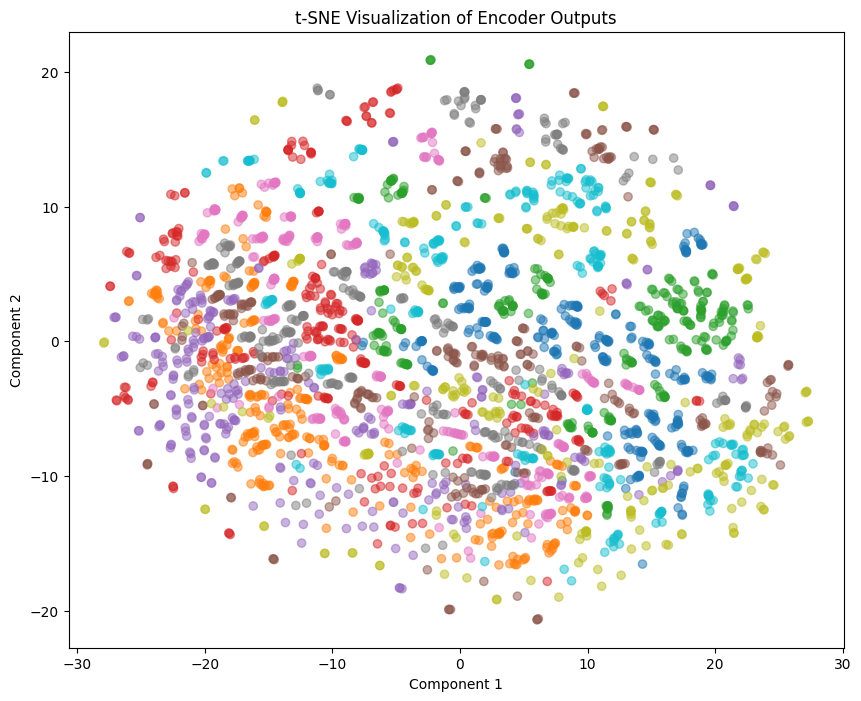

In [112]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.5)
plt.title('t-SNE Visualization of Encoder Outputs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [86]:
label_unique

array(['bus', 'busystreet', 'office', 'openairmarket', 'park',
       'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation'],
      dtype=object)

In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(tsne_results)



In [110]:
cluster_indices = np.where(clusters == 7)[0]
cluster_tsne_data = encoder_df.iloc[cluster_indices]

In [111]:
np.unique(cluster_tsne_data["Label"])

array(['office', 'park', 'quietstreet', 'supermarket', 'tube',
       'tubestation'], dtype=object)

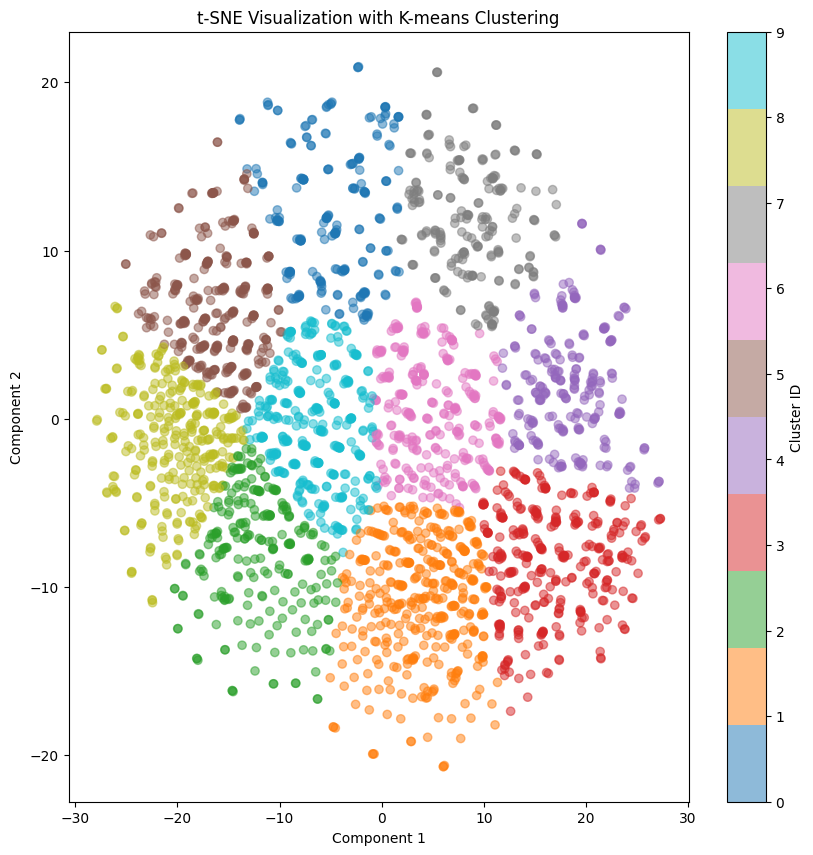

In [109]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='tab10', alpha=0.5)
plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.show()